# How has the salary of MLB players changed over time, and what are the batting characteristics of players with high salaries?

### Question 1: How much has the average salary of a baseball player in MLB changed over time?
I will attempt to present how player salary, in terms of average and median, has changed since 1985, the beginning of free agency.

### Questions 2-7: Are any positive relationships between players with high salaries and:
- Batting Average
- Home Runs
- Runs Scored
- Runs batted in (RBIs)
- On base percentage (OBP)
- OPS (On base plus slugging)
- Slugging Percentage

I will be using the salary and batting data from Sean Lahman's baseball database.
http://www.seanlahman.com/baseball-archive/statistics/

Importing the usual libararies for Data Viz/Analysis:

In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import median

In [22]:
#Loading the batting and salaries dataframe
batting = pd.read_csv('Batting.csv')
salaries = pd.read_csv('salaries.csv')

## 1. Loading the Datasets

Let's start with the batting data.

In [23]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


In [395]:
#lets look at a random slice
batting.iloc[100000:100005]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
100000,britoso01,2015,1,ARI,NL,18,33,5,10,3,...,1.0,1.0,0.0,1,7.0,0.0,0.0,0.0,0.0,0.0
100001,brittza01,2015,1,BAL,AL,64,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
100002,broadmi01,2015,1,SFN,NL,21,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
100003,brookaa01,2015,1,KCA,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,brookaa01,2015,2,OAK,AL,11,2,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


The data here is classical batting data- RBIs, SBs, all important, with a unque ID. When comparing this data with salary data, we can join on player ID and yearID to match salary of each player for each year they played to their batting statistics. 



Loading the Salary data...

In [128]:
salaries.head(2)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000


In [102]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


The salary data contains the year, team, league, player ID, and salary. The player ID and year ID will be important when joining with the batting dataset. 

## 2. Question 1. How has the average and median salary of a MLB player changed over time?

I predict that it will be steadily rising over time. As the salary data only goes back to 1985, which happens to be within the first few years of MLB Free Agency, this analysis will only look at the time between 1985-2016.

I will also be looking at this with respect to league (American or National), to see if there are any significant differences between them. This will be interesting as there is no salary cap in MLB, so teams with larger fanbases tend to have a larger payroll (*cough cough New York Yankees*).

As the New York Yankees are in the American League, I guess that the larger salaries will be in that league as well.

Let's first look at the distrubution of salary data by itself:

(0, 30000000)

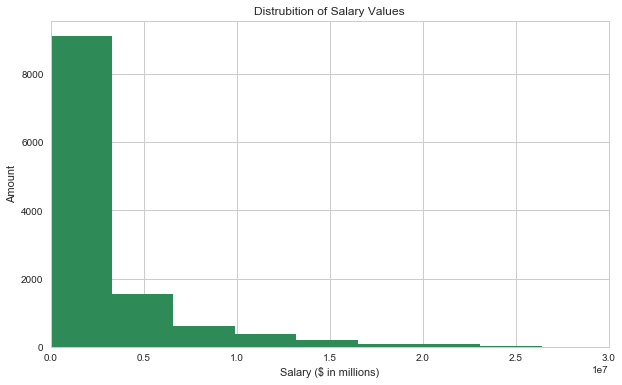

In [681]:
plt.figure(figsize=(10,6))
plt.hist(bat_sal_clean['salary'],bins=10,color='seagreen')
plt.title('Distrubition of Salary Values')
plt.ylabel('Amount')
plt.xlabel('Salary ($ in millions)')
plt.xlim(0,30000000)

The majority of salary data points fall below $330,000. 
The next largest bin is salaries between 330,000 and 600,000 USD. The smallest bin (and highest salary range) is between 23 and 26 Million USD.

Let's now visualize how the distribution is for the following years: 1985, 1990, 2000, 2010, 2016

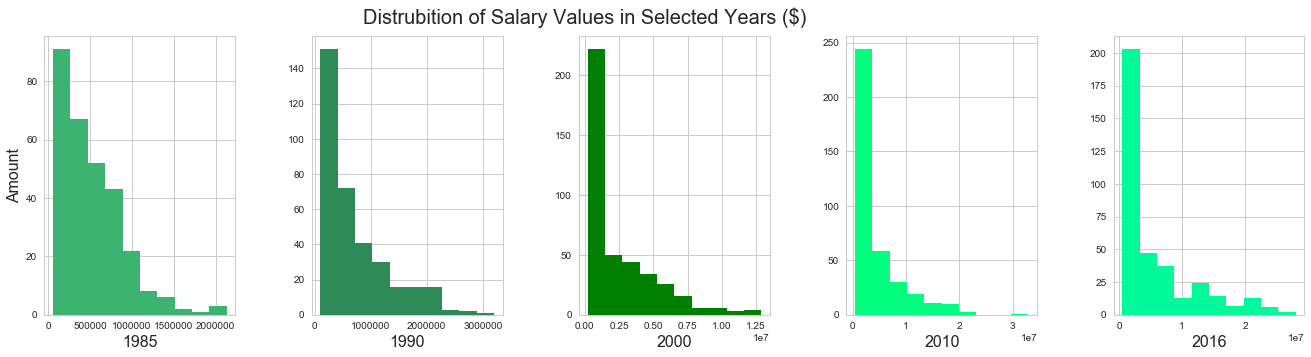

In [779]:
fig, ax = plt.subplots(ncols=5,nrows=1)
ax[0].hist(bat_sal_clean[bat_sal_clean['yearID']==1985]['salary'],bins=10,color='mediumseagreen')
ax[1].hist(bat_sal_clean[bat_sal_clean['yearID']==1990]['salary'],bins=10,color='seagreen')
ax[2].hist(bat_sal_clean[bat_sal_clean['yearID']==2000]['salary'],bins=10,color='green')
ax[3].hist(bat_sal_clean[bat_sal_clean['yearID']==2010]['salary'],bins=10,color='springgreen')
ax[4].hist(bat_sal_clean[bat_sal_clean['yearID']==2016]['salary'],bins=10,color='mediumspringgreen')
fig.set_figwidth(25)
fig.set_figheight(5)
plt.suptitle('Distrubition of Salary Values in Selected Years ($)',fontsize=20)
ax[0].set_ylabel('Amount',fontsize=16)
ax[0].set_xlabel('1985',fontsize=16)
ax[1].set_xlabel('1990',fontsize=16)
ax[2].set_xlabel('2000',fontsize=16)
ax[3].set_xlabel('2010',fontsize=16)
ax[4].set_xlabel('2016',fontsize=16)
#plt.xlabel('Salary ($ in millions)')
plt.subplots_adjust(left=0.2, wspace=0.4, top=0.9)

Here we can see the distribution of salary widen as time goes on, but with the later bins move to higher and higher ranges. Now let's see how they perform over time throughout all years, by looking at the mean salary and median salary.

1. Mean

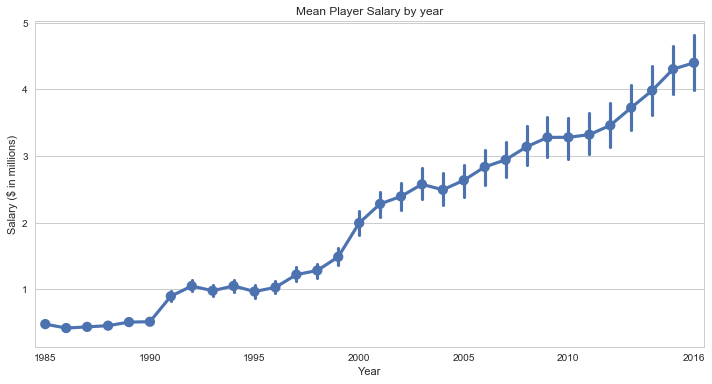

In [515]:
sns.set_style('whitegrid')
labels = [1985,'','','','',1990,'','','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]
sal_num = [0,1,2,3,4,5]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',data=salaries)
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

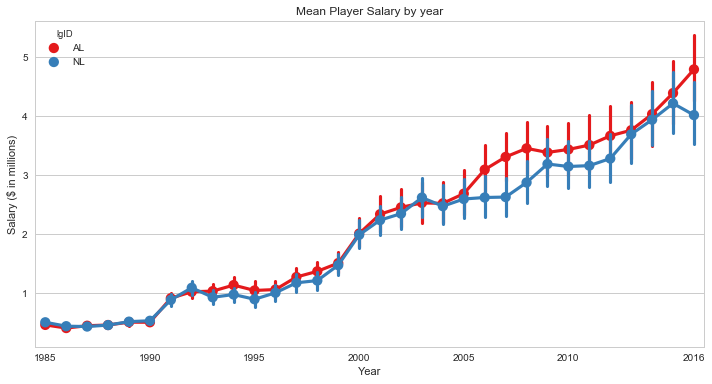

In [352]:
sns.set_style('whitegrid')
labels = [1985,'','','','',1990,'','','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]
sal_num = [0,1,2,3,4,5]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',hue='lgID',data=salaries,palette='Set1',hue_order=['AL','NL'])
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

Since 1985, the average MLB salary has almost increase by a factor of 9, from 500k in 1985 to 4.4 Million in 2016. 
This would be interesting to look at it in comparison to MLB net revenue, which could explain the growth here, along with possibly TV deals.

The average salary of an MLB player has since 1990, after staying stagnant through the late 80s. There was a small bump in 1991, where it hovered around 1 Million USD until 1999 , where it rose up to $2 million by 2000. The average salary steadily rose in the early 2000s, until 2006.

The American and National league average salaries diverged in 2006, with National league salaries staying around 2.6 million USD, reaching 3 million USD in 2009. American league salaries rose past 3 million 3 years earlier than National league salaries, in 2006. The National League has since been playing "catch-up" with the American league. 

The largest gap between American League and National League salaries was in the latest reported year, 2016, with a difference of ~$0.8 million.

Let's now look at the median salary.

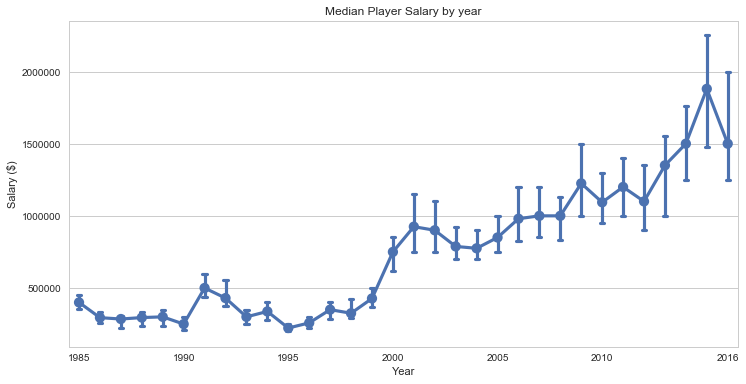

In [513]:
sns.set_style('whitegrid')
labels = [1985,'','','','',1990,'','','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',data=salaries,estimator=median,capsize=.2,linestyles='-')
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($)')
ax.set_xticklabels(labels)
ax.set_title('Median Player Salary by year')

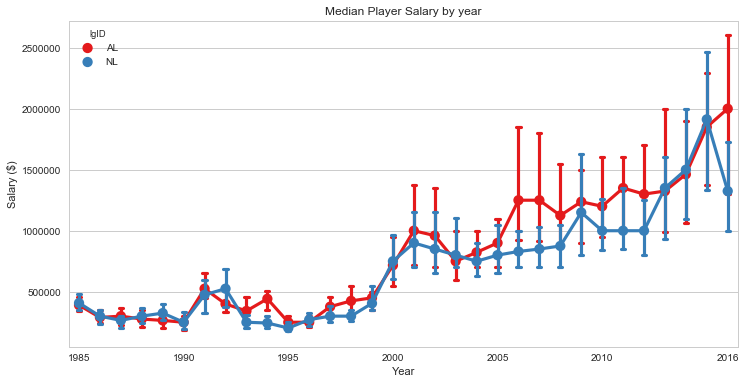

In [355]:
sns.set_style('whitegrid')
labels = [1985,'','','','',1990,'','','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',hue='lgID',data=salaries,palette='Set1',estimator=median,capsize=.2,hue_order=["AL","NL"])
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($)')
ax.set_xticklabels(labels)
ax.set_title('Median Player Salary by year')

The median salary is much more representative than the mean in representing the relationship of MLB salaries, as the effects that outliers have is mititigated. 

The median salary has nearly tripled since 1985, from a median below 500k in 1985 to a median of 1.5 Million in 2016.

Looking deeper, what we see is a median salary showing almost no growth between 1985 and 2000, hovering between 250,000-500,000 USD.The lack of growth in salary between 1985 and 2000 is in stark contrast to the growth in mean salary, which shows a growth of 1 million between 1990 and 2000. 

In 2002, the minimum salary was raised to 200K, and then again to 300k in 2002, and this bump could explain the growth in median salaries in the 2000s.

The gap between National and American league salaries in the late 2000s that is visible in the mean is reflected here as well.


''''''


Now let's connect the salary data to the batting data, on player ID and year ID.

## 3. Merging the batting and salary data

In [358]:
#merging batting and salary data
bat_sal = pd.merge(batting,salaries,on=['playerID','yearID'],how='inner')

#filtering out players with no salay data
bat_sal = bat_sal[(bat_sal['salary'].isnull() == False)]


In [359]:
# resetting the index and dropping it

bat_sal.reset_index(inplace=True)
bat_sal.drop('index',axis=1)

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,CHA,AL,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,22,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,TOR,AL,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0,2.0,0.0,0.0,0.0,0.0,0.0,SLN,NL,750000
5,allenne01,1985,2,NYA,AL,17,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,SLN,NL,750000
6,almonbi01,1985,1,PIT,NL,88,244,33,66,17,...,22,61.0,0.0,1.0,4.0,3.0,6.0,PIT,NL,255000
7,anderla02,1985,1,PHI,NL,57,4,1,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,PHI,NL,250500
8,andujjo01,1985,1,SLN,NL,38,94,2,10,2,...,5,50.0,0.0,0.0,7.0,0.0,2.0,SLN,NL,1030000
9,armasto01,1985,1,BOS,AL,103,385,50,102,17,...,18,90.0,4.0,2.0,0.0,5.0,14.0,BOS,AL,915000


In [374]:
bat_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28287 entries, 0 to 28286
Data columns (total 29 columns):
index       28287 non-null int64
playerID    28287 non-null object
yearID      28287 non-null int64
stint       28287 non-null int64
teamID_x    28287 non-null object
lgID_x      28287 non-null object
G           28287 non-null int64
AB          28287 non-null int64
R           28287 non-null int64
H           28287 non-null int64
2B          28287 non-null int64
3B          28287 non-null int64
HR          28287 non-null int64
RBI         28287 non-null float64
SB          28287 non-null float64
CS          28287 non-null float64
BB          28287 non-null int64
SO          28287 non-null float64
IBB         28287 non-null float64
HBP         28287 non-null float64
SH          28287 non-null float64
SF          28287 non-null float64
GIDP        28287 non-null float64
teamID_y    28287 non-null object
lgID_y      28287 non-null object
salary      28287 non-null int64
AVG       

At the end you can see the salary data along with the player data.

''''

The batting data is lacking in key features, such as batting average, on-base percentage, and slugging percentage. Let's calculate them now.

## 4. Feature Creation & Cleaning the merged dataset

Now let's create the percentage based features we are creating- OBP, SLG, and OPS.

In [517]:
bat_sal['1B'] = (bat_sal['H']-((bat_sal['2B'])+(bat_sal['3B'])+(bat_sal['HR'])))

#batting average - how many hits a player has per at-bat
bat_sal['AVG'] = ((bat_sal['H'].apply(float))/(bat_sal['AB'].apply(float)))

#on-base percentage- how often a player reaches base [hits]+[walks]+[hit by pitch]/[at-bats]+[walks]+[hit by pitch]+[sacrifice flies]
bat_sal['OBP'] = (((bat_sal['H'].apply(float))+(bat_sal['BB'])+(bat_sal['HBP'])))/((bat_sal['AB'].apply(float))+(bat_sal['SF'])+(bat_sal['BB'])+(bat_sal_clean['HBP']))

#slugging- total bases/at-bats: [Singles] + [Doubles] + [Triples x 2] + [Home Runs x 3])/At Bats
bat_sal['SLG'] = ((bat_sal['1B'])+(bat_sal['2B']*2)+(bat_sal['3B']*3)
                  +(bat_sal['HR']*4))/(bat_sal['AB'].apply(float))

#OPS - on base plus slugging
bat_sal['OPS'] = bat_sal['OBP']+bat_sal['SLG']

In [497]:
print bat_sal['AVG'].describe()

count    21811.000000
mean         0.210699
std          0.120947
min          0.000000
25%          0.157895
50%          0.240664
75%          0.275501
max          1.000000
Name: AVG, dtype: float64


In [617]:
bat_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28287 entries, 0 to 28286
Data columns (total 31 columns):
index       28287 non-null int64
playerID    28287 non-null object
yearID      28287 non-null int64
stint       28287 non-null int64
teamID_x    28287 non-null object
lgID_x      28287 non-null object
G           28287 non-null int64
AB          28287 non-null int64
R           28287 non-null int64
H           28287 non-null int64
2B          28287 non-null int64
3B          28287 non-null int64
HR          28287 non-null int64
RBI         28287 non-null float64
SB          28287 non-null float64
CS          28287 non-null float64
BB          28287 non-null int64
SO          28287 non-null float64
IBB         28287 non-null float64
HBP         28287 non-null float64
SH          28287 non-null float64
SF          28287 non-null float64
GIDP        28287 non-null float64
teamID_y    28287 non-null object
lgID_y      28287 non-null object
salary      28287 non-null int64
AVG       

Looking at the info above, we see that the AVG category has a lot of null values. THis is indicative of null values for either at-bats or hits. Lets take a closer look.

In [597]:
bat_sal[bat_sal['AVG'].isnull()]

,index,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,...,SF,GIDP,teamID_y,lgID_y,salary,AVG,OBP,SLG,OPS,1B
0,0,ackerji01,1985,1,TOR,AL,61,0,0,0,...,0.0,0.0,TOR,AL,170000,NaN,NaN,NaN,NaN,0
1,1,agostju01,1985,1,CHA,AL,54,0,0,0,...,0.0,0.0,CHA,AL,147500,NaN,NaN,NaN,NaN,0
3,3,alexado01,1985,1,TOR,AL,36,0,0,0,...,0.0,0.0,TOR,AL,875000,NaN,NaN,NaN,NaN,0
5,5,allenne01,1985,2,NYA,AL,17,0,0,0,...,0.0,0.0,SLN,NL,750000,NaN,NaN,NaN,NaN,0
11,11,atherke01,1985,1,OAK,AL,56,0,0,0,...,0.0,0.0,OAK,AL,107333,NaN,NaN,NaN,NaN,0
20,20,bannifl01,1985,1,CHA,AL,34,0,0,0,...,0.0,0.0,CHA,AL,811250,NaN,NaN,NaN,NaN,0
26,26,beattji01,1985,1,SEA,AL,18,0,0,0,...,0.0,0.0,SEA,AL,470000,NaN,NaN,NaN,NaN,0
27,27,beckwjo01,1985,1,KCA,AL,49,0,0,0,...,0.0,0.0,KCA,AL,358000,NaN,NaN,NaN,NaN,0
35,35,berenju01,1985,1,DET,AL,31,0,0,0,...,0.0,0.0,DET,AL,240000,NaN,NaN,NaN,NaN,0
40,40,birtsti01,1985,1,OAK,AL,29,0,0,0,...,0.0,0.0,OAK,AL,60000,NaN,NaN,NaN,NaN,0


There appears to be a glut of players whom appeared in games but never had an at-bat, most likely all pitchers in the American League.

These rows will now be deleted..

In [603]:
bat_sal_clean = bat_sal.dropna(subset=['AVG'])

In [604]:
bat_sal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21811 entries, 2 to 28285
Data columns (total 31 columns):
index       21811 non-null int64
playerID    21811 non-null object
yearID      21811 non-null int64
stint       21811 non-null int64
teamID_x    21811 non-null object
lgID_x      21811 non-null object
G           21811 non-null int64
AB          21811 non-null int64
R           21811 non-null int64
H           21811 non-null int64
2B          21811 non-null int64
3B          21811 non-null int64
HR          21811 non-null int64
RBI         21811 non-null float64
SB          21811 non-null float64
CS          21811 non-null float64
BB          21811 non-null int64
SO          21811 non-null float64
IBB         21811 non-null float64
HBP         21811 non-null float64
SH          21811 non-null float64
SF          21811 non-null float64
GIDP        21811 non-null float64
teamID_y    21811 non-null object
lgID_y      21811 non-null object
salary      21811 non-null int64
AVG       

Looks like the null values for batting average were taken care of. Now we should do the same but for National league pitchers and players who hardly-played. Let's set a threshold number of at-bats, to nuetralize the effect of said players, say 100.

In [606]:
bat_sal_clean = bat_sal[bat_sal['AB']>100]

In [607]:
bat_sal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 2 to 28285
Data columns (total 31 columns):
index       12037 non-null int64
playerID    12037 non-null object
yearID      12037 non-null int64
stint       12037 non-null int64
teamID_x    12037 non-null object
lgID_x      12037 non-null object
G           12037 non-null int64
AB          12037 non-null int64
R           12037 non-null int64
H           12037 non-null int64
2B          12037 non-null int64
3B          12037 non-null int64
HR          12037 non-null int64
RBI         12037 non-null float64
SB          12037 non-null float64
CS          12037 non-null float64
BB          12037 non-null int64
SO          12037 non-null float64
IBB         12037 non-null float64
HBP         12037 non-null float64
SH          12037 non-null float64
SF          12037 non-null float64
GIDP        12037 non-null float64
teamID_y    12037 non-null object
lgID_y      12037 non-null object
salary      12037 non-null int64
AVG       

Good! We now do not have any missing values.


As we know that the average/median salary has risen over time, it is important to standardize the salary data to quantify how large a player's salary is respective to the mean salary of the respective year.

In [518]:
def standardize(df):
    return (df - df.mean()) / (df.std())

In [608]:
#standardizing the salary data with respect to year
bat_sal_clean['sal_z'] = bat_sal_clean.groupby('yearID')['salary'].apply(standardize)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [609]:
bat_sal_clean['sal_z'].head(2)

2   -0.750208
6   -0.702234
Name: sal_z, dtype: float64

It worked. Now the data is standardized with respect to year. Let's get to visualizing!

## 5. Questions 2-7: What is the relationship between some key batting stats and salary?

Let's see if there is a arelationship between salary and:
- Batting Average
- Home Runs
- Runs Scored
- Runs Batted In
- On-base percentage (OBP)
- Slugging percentage (SLG)
- On-base plus slugging (OPS)

First, I will look at each of these features independantly to see their distributions.

Next, I will evauate relatonships between the standardized salary and each of the 7 named features. To accomplish this, linear regression plots of each comparing the standardized salary scores with the above metrics will be created.

I predict positive relationships for Home Runs and the percentage categories (OBP,SLG,OPS), but not strong positive relationships for for the others (BA, R, RBIs)

After, I will break it down by league and see if there are any differences between them. I predict that the National League to have slighly weaker relationships than the American league, as it had lower median/average salaries in recent years.

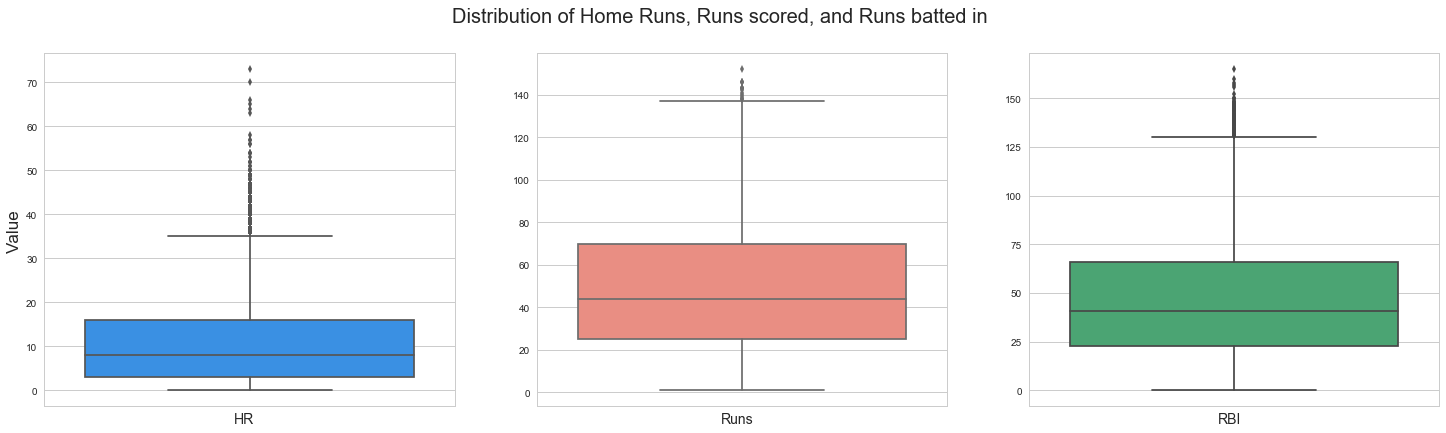

In [792]:
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(25)
fig.set_figheight(6.5)

sns.boxplot(bat_sal_clean['HR'],ax=ax[0],orient='v',color='dodgerblue')
sns.boxplot(bat_sal_clean['R'],ax=ax[1],orient='v',color='salmon')
sns.boxplot(bat_sal_clean['RBI'],ax=ax[2],orient='v',color='mediumseagreen')
fig.suptitle('Distribution of Home Runs, Runs scored, and Runs batted in',fontsize=20)
fig.text(0.23, 0.09, 'HR', ha='left',fontsize=14)
fig.text(0.51, 0.09, 'Runs', ha='center',fontsize=14)
fig.text(0.79, 0.09, 'RBI', ha='right',fontsize=14)
ax[0].set_ylabel('Value',fontsize=17)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

In [611]:
print bat_sal_clean['HR'].describe(),bat_sal_clean['R'].describe(),bat_sal_clean['RBI'].describe()

count    12037.000000
mean        10.947495
std          9.916069
min          0.000000
25%          3.000000
50%          8.000000
75%         16.000000
max         73.000000
Name: HR, dtype: float64 count    12037.000000
mean        49.174379
std         28.584361
min          1.000000
25%         25.000000
50%         44.000000
75%         70.000000
max        152.000000
Name: R, dtype: float64 count    12037.000000
mean        46.986375
std         29.458999
min          0.000000
25%         23.000000
50%         41.000000
75%         66.000000
max        165.000000
Name: RBI, dtype: float64


The average player hard 11 Home Runs, 49 Runs, and 47 Runs Batted In. There are large deviation values for each feature, however. Runs had a slightly larger median (44) than RBIs (41). 

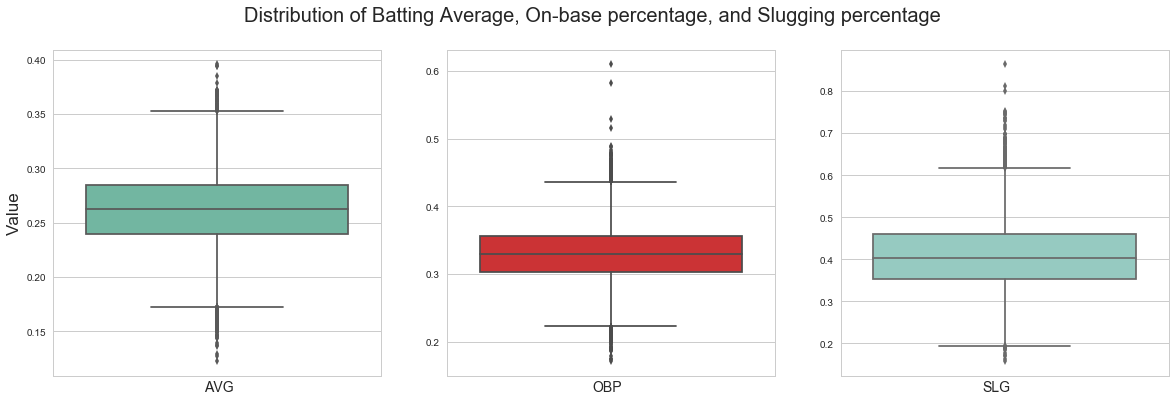

In [794]:
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(20)
fig.set_figheight(6)
sns.boxplot(bat_sal_clean['AVG'],ax=ax[0],orient='v',palette='Set2')
sns.boxplot(bat_sal_clean['OBP'],ax=ax[1],orient='v',palette='Set1')
sns.boxplot(bat_sal_clean['SLG'],ax=ax[2],orient='v',palette='Set3')
#sns.boxplot(bat_sal_clean['OPS'],ax=ax[3],orient='v',color='b')
fig.suptitle('Distribution of Batting Average, On-base percentage, and Slugging percentage',fontsize=20)
fig.text(0.51, 0.09, 'OBP', ha='center',fontsize=14)
fig.text(0.23, 0.09, 'AVG', ha='left',fontsize=14)
fig.text(0.79, 0.09, 'SLG', ha='right',fontsize=14)
ax[0].set_ylabel('Value',fontsize=17)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

In [616]:
print bat_sal_clean['AVG'].describe(),bat_sal_clean['OBP'].describe(),bat_sal_clean['SLG'].describe(),bat_sal_clean['OPS'].describe()

count    12037.000000
mean         0.261790
std          0.034728
min          0.122642
25%          0.239910
50%          0.262537
75%          0.284974
max          0.395722
Name: AVG, dtype: float64 count    12037.000000
mean         0.329768
std          0.041753
min          0.171975
25%          0.302941
50%          0.328918
75%          0.356436
max          0.609400
Name: OBP, dtype: float64 count    12037.000000
mean         0.408710
std          0.080138
min          0.158416
25%          0.353247
50%          0.404110
75%          0.459016
max          0.863445
Name: SLG, dtype: float64 count    12037.000000
mean         0.738479
std          0.112926
min          0.344095
25%          0.664474
50%          0.733499
75%          0.808012
max          1.421733
Name: OPS, dtype: float64


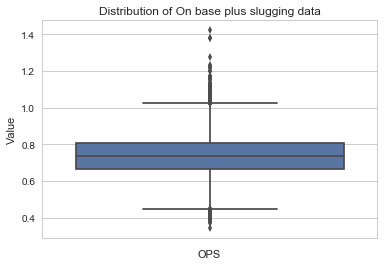

In [622]:
sns.boxplot(bat_sal_clean['OPS'],orient='v')
plt.title('Distribution of On base plus slugging data')
plt.xlabel('OPS')
plt.ylabel('Value')

The average player had a batting average of .262, On-base percentage of .329, and an Slugging percentage of .409, and an OPS of .738.

'''

Now let's visualize possible relationships between standardized salary and the above metrics.

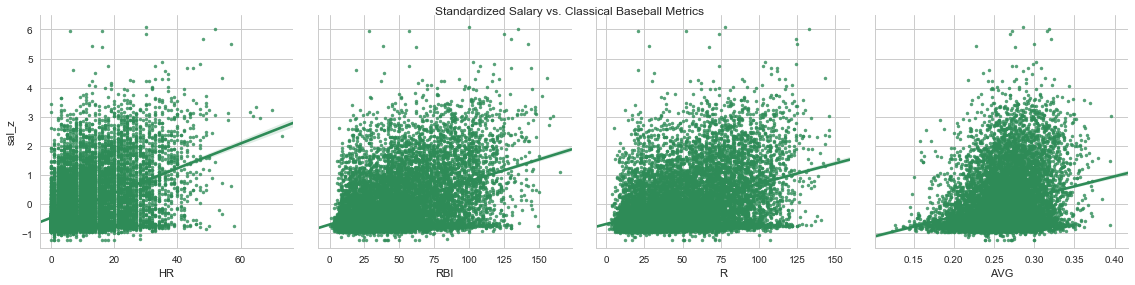

In [508]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["HR", "RBI",'R','AVG'],)
g.map(sns.regplot,scatter_kws={'s':12},dropna=True,color='seagreen')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. Classical Baseball Metrics')
g.set(ylim=(-1.5, 6.5))

As expected, there was a somewhat strong positive relationship between Standardized Salary and Home Runs, and weaker positive relationships between Standardized Salary and RBIs, Runs Scored, and Batting Average. Unsurprisingly batting average had the weakest positive relationship, but it was stronger than expected.

Now let's see if there is any effect between leagues:

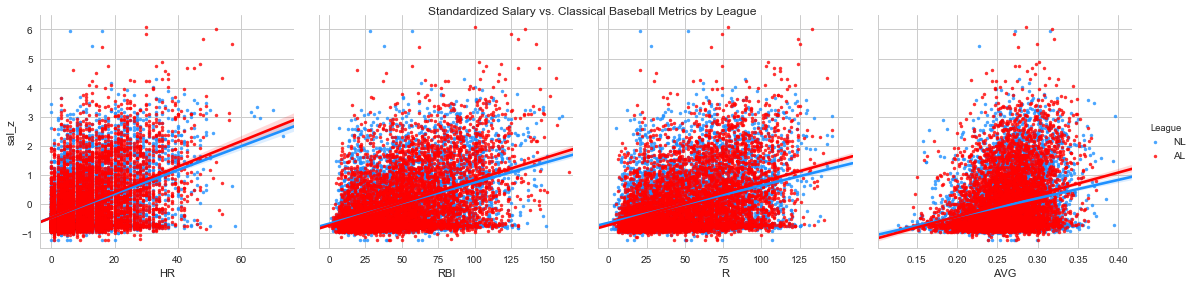

In [507]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["HR", "RBI",'R','AVG'],
                 hue="lgID_x",palette=['dodgerblue','red'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True)
g.add_legend(title='League')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. Classical Baseball Metrics by League')
g.set(ylim=(-1.5, 6.5))

As expected, the National league had slighter weaker positive relationships than the American league, but for the most part nothing out of the ordinary here.

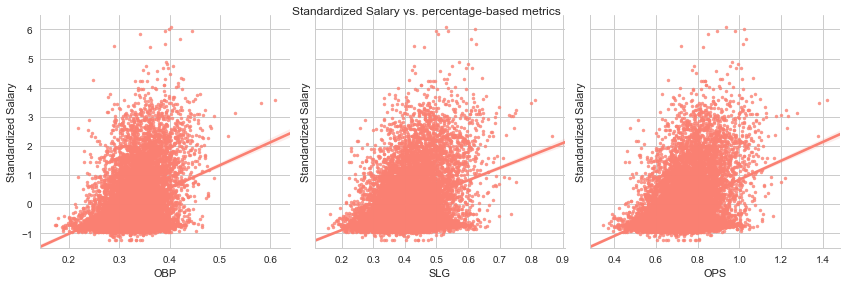

In [618]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["OBP", "SLG",'OPS'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True,color='salmon')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. percentage-based metrics')
g.set(ylim=(-1.5, 6.5))
g.set(ylabel='Standardized Salary')

There are strong positive relationships between Standardized Salary and OBP, SLG, and OPS. with OPS and OBP being stronger than Slugging. Players with higher stats in these categories were more likely to have a higher salary than a lower salary.

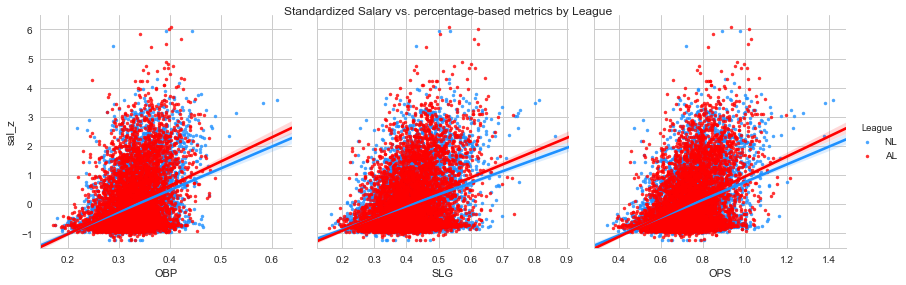

In [510]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["OBP", "SLG",'OPS'],hue='lgID_x',palette=['dodgerblue','r'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True)
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. percentage-based metrics by League')
g.set(ylim=(-1.5, 6.5))
g.add_legend(title='League')


As expected, National League had a weaker positive relationship than the American League did between Standardized Salary and OBP, Slugging, and OPS. Nothing jumps out here though, however.

## Conclusion

I first looked at how the average salary has changed over time, by mean and median.
While the mean salary has increased 9-fold since 1985 (from 500,000 USD in '85 to 4.5 million USD in '16), the median salary has has tripled since 1985, from below 500k to 1.5 Milllion. 

This salary data was then joined with batting data on Player ID and Year, and the salary data was then standardized to put each salary point in context with it's respective year. This standardized salary was then analyzed to see if there were positive relationships between it and:
- Batting Average
- Home Runs
- Runs Scored
- Runs Batted In
- On base percentage
- Slugging percentage
- OPS (On-base plus slugging)

There are positive relationships between standardized salary and each of the features above, but the strongest positive relatonships appeared to be with OBP/OPS and Home Runs.

There are some limitations here. One, I did not include player position in the analysis, which probably plays some role in how much a player makes. As I did not include this, I filtered the dataset using having 100 At-Bats as a threshold to weed out pitchers, who don't bat much (American League) and don't bat well, as it is not their main job. This has an effect of also filtering out players who stayed in the majors for a short time, or got hurt and missed a lot of the season. So there is one qualification:
- minimum 100 at-bats

In the future I would like to carry out similar analyses with respect to position, pitching statistics (Wins, ERA, etc.) as well as WAR.

## References

https://www.baseball-reference.com/bullpen/Minimum_salary

http://www.seanlahman.com/baseball-archive/statistics/